# Import Dependencies

In [48]:
import tensorflow as tf #import tensorflow
import logging #import logging for display error
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

import numpy as np #import numpy helps to represent our data as highly perfomance list


# Set up training data

## in this data I use supervised learninng where we provide input that is Celsius and output in the form of farenheit

# Terminology Machine Learning
## - **Feature** The input. In this case single value because degrees celcius
## - **Labels** The output. In this case single value because degree fahrenheit
## - **Example** A pair input/output used during training. In this case from `celcius` and `fahrenheit`

In [49]:
'''
data set up train conversion
'''
celcius = np.array([-40, -10, 0, 8, 15, 22, 38],  dtype = float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)

#print from data set up train
for i,c in enumerate(celcius):
    print("{} degrees Celcius = {} degrees Fahrenheit".format(c, fahrenheit[i]))


-40.0 degrees Celcius = -40.0 degrees Fahrenheit
-10.0 degrees Celcius = 14.0 degrees Fahrenheit
0.0 degrees Celcius = 32.0 degrees Fahrenheit
8.0 degrees Celcius = 46.0 degrees Fahrenheit
15.0 degrees Celcius = 59.0 degrees Fahrenheit
22.0 degrees Celcius = 72.0 degrees Fahrenheit
38.0 degrees Celcius = 100.0 degrees Fahrenheit


# Create Model

## Next, make the model. Model used as simple as we ca, dense network.

# Build layer
## We'll call layer `layer0` and create by `tf.keras.layers.Dense` with configuration

## - `input_shape=[1]` this specifies the input to this layer is a single value, the single value is a floating point number celcius
## - `units=1` this specifies the number of neurons in the layer, the number of neurons defines how many internal variabel the layer has to try to learn how to solve the problem. The single value is a floating point number fahrenheit

In [50]:
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1])

# Assemble layers into the model

## Once layers are defined, they need to be assembled into a model. The Sequential model takes a list of layers as an argument, specifying the calculation order from the input to the output

In [51]:
model = tf.keras.Sequential([layer0]) 

# You can define layers above or below. 

## layers define in the model definition

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Compile the model, with loss and optimizer functions

## Before train model has toi be compiled

## - `Loss function` A way of measuring how far off predictions are from the desired outcome
## - `Optimizer function` A way of adjusting internal values in order to reduce the loss

In [52]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

## These are used during training `model.fit()` bellow to first calculate the loss at each point and then improve it. In fact act of calculating the current loss of a model and then improving it is precisely what training is.

## The optimizer function is used to adjust internal variabel until the model reflects the actual equation to convert Celcius to Fahrenheit

## One part of the optimizer you may need to think about is the speed of learning (`0.1` in code above). This is measure of steps taken when adjusting values in a model. Too big and accuracy dropped. Find values usually in `0.001` and `0.1`

In [53]:
train = model.fit(celcius, fahrenheit, epochs = 500, verbose=False) 
# model.fit() ==> train code
#celcius ==> variabel input
#fahrenheit ==> variabel output
#epoch ==> how many times this cycle should be run
#verbose ==> control how much output  the method produces

print("Finish trained model")

Finish trained model


# Display training statistic

## The `fit` method returns a train object. We can use this object to plot how the loss of our model goes down after each training epoch.

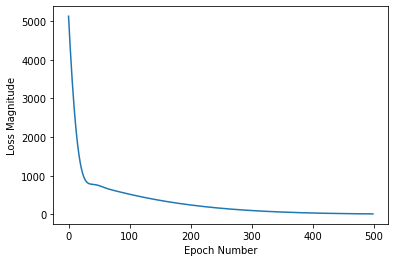

In [54]:
import matplotlib.pyplot as plt #import dependencies matplotlib

plt.xlabel("Epoch Number") #label X/horizontal
plt.ylabel("Loss Magnitude") #label y/vertical
plt.plot(train.history['loss']) #return train object loss

## A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value `fahrenheit`.

## But as you can see, our model initially had a high loss, and then had a steady and slow improvment until it was clos to "perfect" the end.

# Use the model to predict values

## So, for example, if the Celsius value is 100, what do you think the Fahrenheit result will be? Take a guess before you run this code.

In [55]:
print(model.predict([100.0]))

#model.predict() ==> for to predict
#model.predict([...]) ==> input for predict in his case celcius degrees to convert in fahrenheit degrees


[[211.30136]]


## Review

## - We created a model with Dense layer and trained it with 3500 examples from 7 pairs(`data set up trained`) and `epochs = 500`

# Looking at the layer weights

In [56]:
print("These are the layer variables: {}".format(layer0.get_weights()))

These are the layer variables: [array([[1.8254689]], dtype=float32), array([28.754469], dtype=float32)]


## The first variabel is close to `1.8` and the second is close to `32`(although `28.7554469` but this is close to `32`). These values (`1.8` and `32`) are the actual variables in the actual conversion formula, this is very close to the value in the conversion formula 

# Little experiment

## what if we created more Dense layers with different units, which therefore also has more variables?

In [57]:
'''
Build Layer
'''
layer0 = tf.keras.layers.Dense(units=4, input_shape=[1])
layer1 = tf.keras.layers.Dense(units=4)
layer2 = tf.keras.layers.Dense(units=1)

'''
Assemble layers
'''
model = tf.keras.Sequential([layer0, layer1, layer2])

'''
Model compile
'''
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

'''
Model Train(fit)
'''
model.fit(celcius, fahrenheit, epochs=500, verbose=False)
print("Finished training the model")

'''
Predict
'''
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celcius is: {} degrees Fahrenheit".format(model.predict([100.0])))

'''
Looking layer weight
'''
print("These are the layer0 variables: {}".format(layer0.get_weights()))
print("These are the layer1 variables: {}".format(layer1.get_weights()))
print("These are the layer2 variables: {}".format(layer2.get_weights()))

Finished training the model
[[211.74744]]
Model predicts that 100 degrees Celcius is: [[211.74744]] degrees Fahrenheit
These are the layer0 variables: [array([[ 0.87813944,  0.2609989 ,  0.102182  , -0.20770687]],
      dtype=float32), array([ 2.908337 , -2.262719 , -2.2069888, -2.856667 ], dtype=float32)]
These are the layer1 variables: [array([[ 0.89772755, -0.10108886, -0.5602606 , -1.0055665 ],
       [-0.803159  , -0.0159582 ,  0.6401319 ,  0.65822697],
       [-0.7280839 , -0.3370738 ,  0.31502575,  0.8687057 ],
       [-1.2285683 ,  0.23955962, -0.42185095,  0.95043063]],
      dtype=float32), array([ 2.8888383 , -0.84708637, -2.7540588 , -2.8991883 ], dtype=float32)]
These are the layer2 variables: [array([[ 1.0869486 ],
       [-0.10889199],
       [-0.69756854],
       [-0.9880271 ]], dtype=float32), array([2.8091795], dtype=float32)]
